**Perform data cleaning and EDA on a dataset of your choice, such as the Titanic dataset
from kaggle. Explore the relationship between variables ans identify patterns and trends in the data.**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
train = pd.read_csv('C:/Users/HP/Downloads/titanic/train.csv')
test = pd.read_csv('C:/Users/HP/Downloads/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# dropping unnecessary columns
train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# checking for null values
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

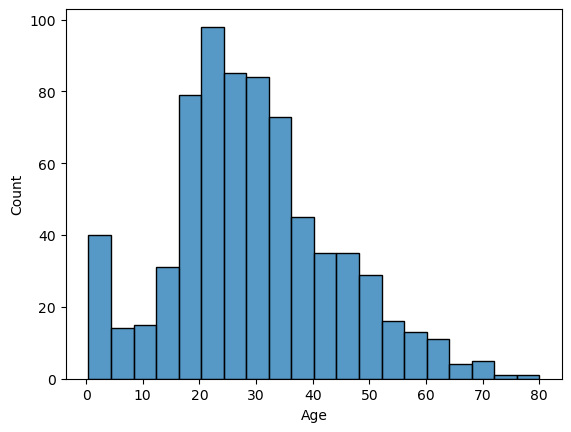

In [10]:
# checking the distribution of age
sns.histplot(data=train, x= 'Age')

In [11]:
# since the data is almost normally distributed we can fill the missing values with mean of column
train['Age'] = round(train['Age'].fillna(train['Age'].mean()),2)

In [12]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
# dropping both rows that are empty in embarked column
train = train.dropna(axis = 0)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

There are no remaining null values in the column.

In [15]:
# Renaming column name
train = train.rename(columns = {'Sex': 'Gender'})
train.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653622,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968367,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train.corr()['Survived'].sort_values()

C:\Users\HP\AppData\Local\Temp\ipykernel_12228\718193493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Survived'].sort_values()


Pclass     -0.335549
Age        -0.074675
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
Survived    1.000000
Name: Survived, dtype: float64

### Data Analysis and Visualization

In [18]:
# Checking the balance of class
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

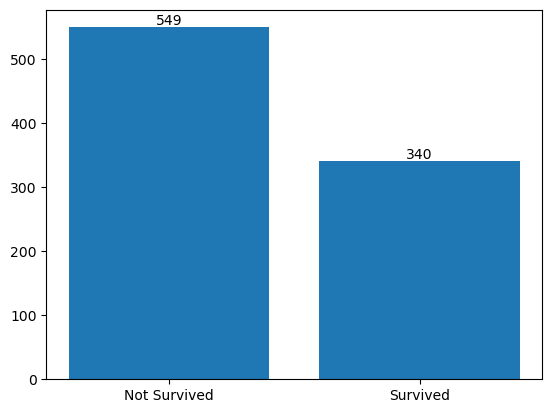

In [19]:
ax = plt.bar(['Not Survived', 'Survived'], train['Survived'].value_counts())
plt.bar_label(ax);

* **The bar chart shows that more passengers did not survive than survived. The survival rate was only about 38%.**

In [20]:
train.groupby('Survived')['Gender'].value_counts()

Survived  Gender
0         male      468
          female     81
1         female    231
          male      109
Name: Gender, dtype: int64

#### Gender

In [21]:
train['Gender'].value_counts()

male      577
female    312
Name: Gender, dtype: int64

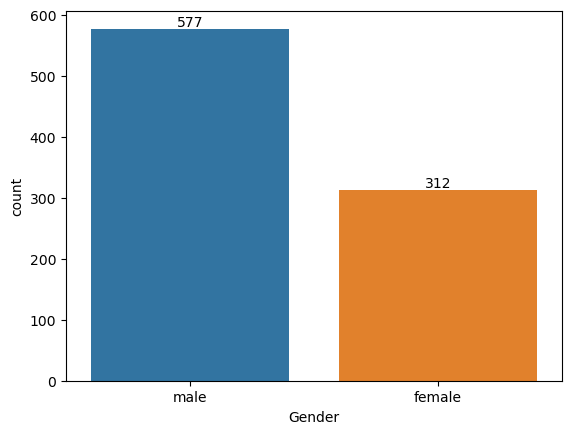

In [22]:
ax = sns.countplot(data = train, x= 'Gender')

for i in ax.containers:
    ax.bar_label(i)

* **The graph shows that there were more male passengers as compared to female passengers boarding on titanic.**

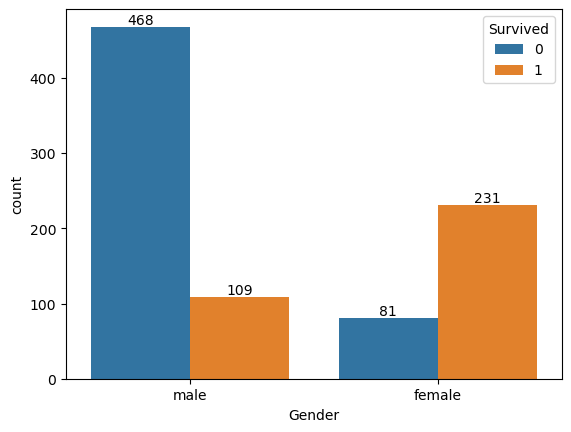

In [23]:
ax = sns.countplot(data = train, x = 'Gender', hue = 'Survived')

for i in ax.containers:
    ax.bar_label(i)

* **The passengers who were female had a much higher survival rate than those who were male. This reflects the ***“women and children first”*** policy that was followed during the evacuation.**

#### Age

In [24]:
train['Age'].mean()

29.653622047244095

<Axes: xlabel='Age', ylabel='Count'>

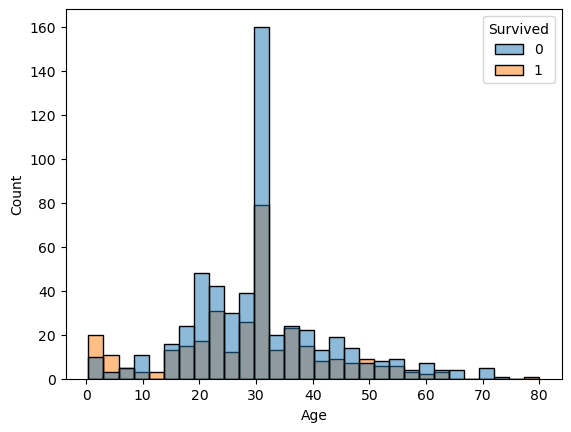

In [25]:
sns.histplot(data = train, x = 'Age', hue = 'Survived')

* **The histogram shows the distribution of ages of individuals who survived and did not survive. The majority of individuals are in the age group of around 20-30 years old, with a significant peak at around age 30 for those who did not survive. There are very few survivors in this age group compared to non-survivors.**

* **Based on the histogram, we can infer that age was a significant factor in determining the survival rate of passengers on the Titanic. The highest number of non-survivors were in the age group around 30, while the highest number of survivors were young children. This could be due to the fact that children were given priority when it came to boarding lifeboats.**

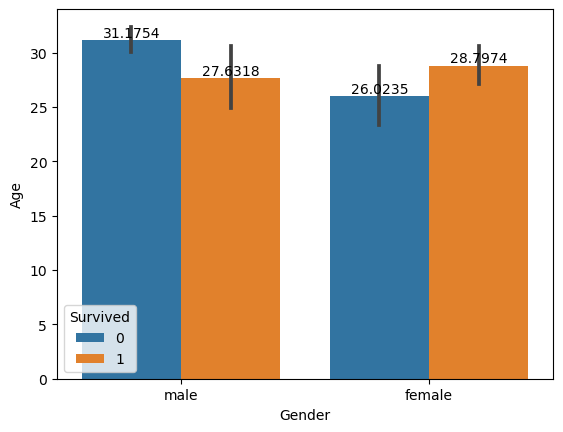

In [26]:
ax = sns.barplot(data = train, x = 'Gender', y ='Age', hue = 'Survived')

for i in ax.containers:
    ax.bar_label(i)

#### Passenger Class

In [27]:
train['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

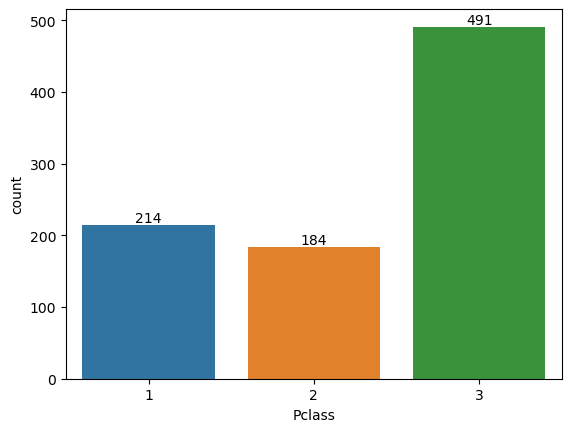

In [28]:
ax = sns.countplot(data = train, x = 'Pclass')

for i in ax.containers:
    ax.bar_label(i)

* **The bar graph shows that the majority of the passengers (491) belonged to the third class, followed by the first class (214) and the second class (184). This indicates that the Titanic had more lower-class passengers than upper-class passengers.**

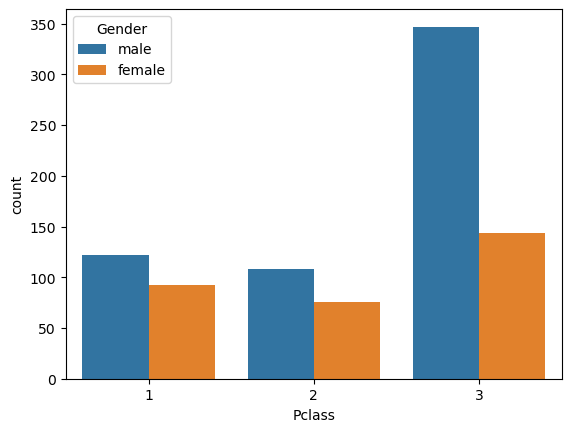

In [29]:
sns.countplot(data=train, x='Pclass', hue = 'Gender');

* **Based on the bar graph, we can infer that there were more males than females on the Titanic across all classes. The highest number of individuals were in Pclass 3, which had the highest number of males. In Pclass 1 and 2, the counts of males and females are relatively similar.**

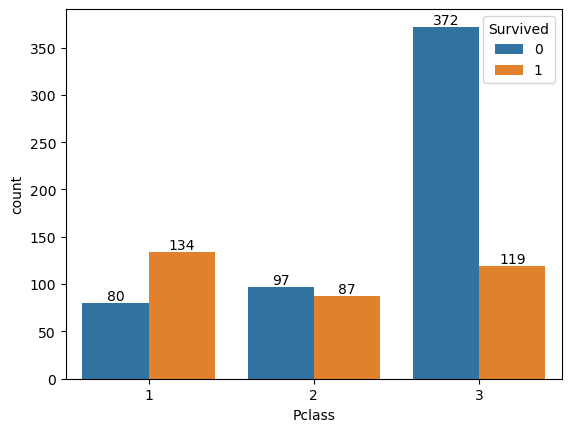

In [30]:
ax = sns.countplot(data = train, x= 'Pclass', hue = 'Survived')

for i in ax.containers:
    ax.bar_label(i)

* **The ticket class was an important factor that influenced the survival rate of the passengers.**

* **The passengers in the first class had the highest survival rate (63%), as indicated by the large orange bar. This suggests that the class of the ticket influenced the access to the lifeboats and the rescue priority. The first class passengers also paid more for their tickets, which may have reflected their wealth and social status.**

* **The passengers in the second class had a moderate survival rate (47%). This suggests that the second class passengers had some advantages over the third class passengers, but not as much as the first class passengers.**

### Embarked

In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

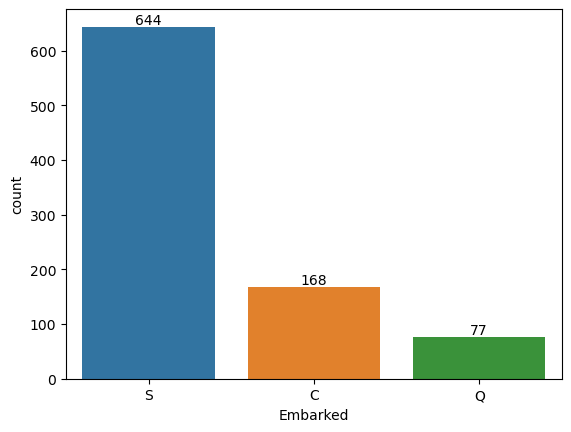

In [32]:
ax = sns.countplot(data = train, x = 'Embarked')

for i in ax.containers:
    ax.bar_label(i)

* **The bar graph shows that the majority of the passengers (644) embarked from Southampton, followed by 168 from Cherbourg, and only 77 from Queenstown.**

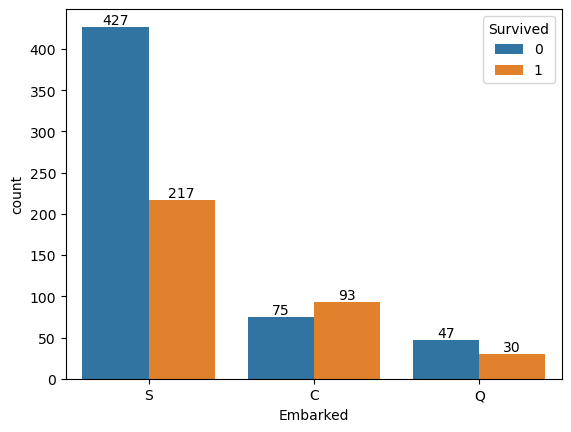

In [33]:
ax =sns.countplot(data = train, x= 'Embarked', hue = 'Survived')

for i in ax.containers:
    ax.bar_label(i)

* **The bar graph shows that the survival rate varied depending on the embarkation location. The passengers who embarked from Cherbourg had the highest survival rate (55%), followed by those who embarked from Queenstown (39%) and those who embarked from Southampton (34%)**

<Axes: xlabel='Embarked', ylabel='count'>

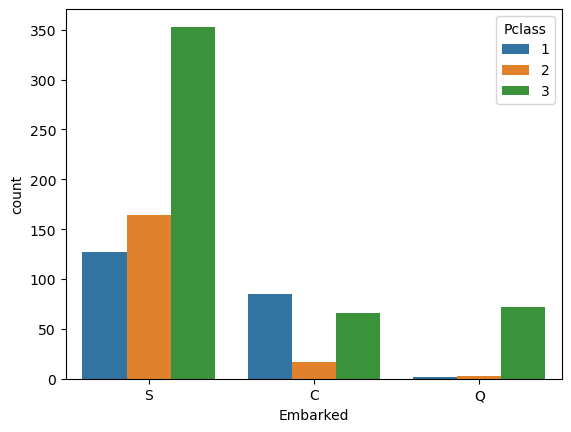

In [34]:
sns.countplot(data = train, x= 'Embarked', hue = 'Pclass')

* **The bar graph also shows that the ticket class varied depending on the embarkation location.**

* **The passengers who embarked from Southampton had the most balanced distribution of classes, but still dominated by class 3.**

* **The passengers who embarked from Cherbourg had the highest proportion of class 1 tickets, followed by class 3 and class 2.**

* **The passengers who embarked from Queenstown had almost exclusively class 3 tickets, with very few class 1 and class 2 tickets.**

#### Fare

In [35]:
# Fare analysis
train['Fare'].mean()

32.09668087739032

In [36]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

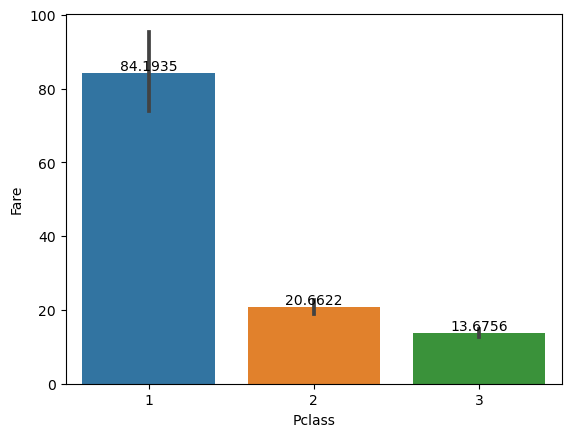

In [37]:
ax = sns.barplot(data=train, x='Pclass', y='Fare')

for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Age', ylabel='Fare'>

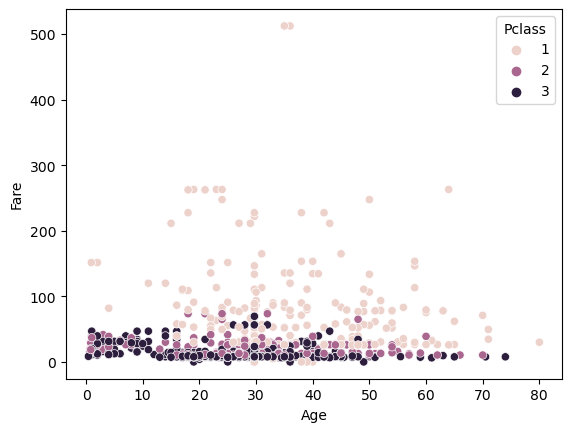

In [38]:
sns.scatterplot(data = train, y='Fare', x = 'Age', hue = 'Pclass')

* **The scatter plot also shows that there is no clear correlation between the fare and the age of the passengers.**

<Axes: xlabel='Age', ylabel='Fare'>

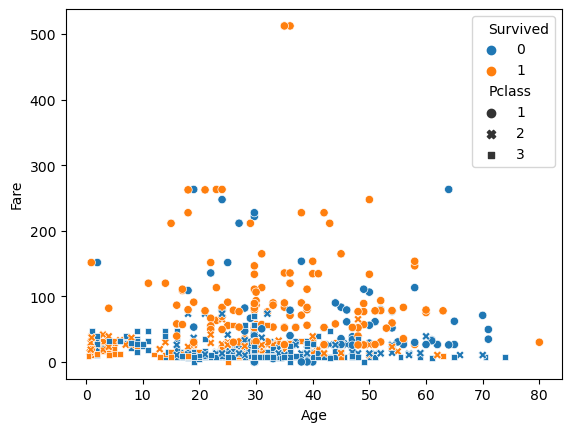

In [39]:
sns.scatterplot(data= train, x= 'Age', y= "Fare", hue = 'Survived', style = 'Pclass')

* **The scatter plot also shows that the survival rate of the passengers was affected by their class and their fare. The passengers who survived are marked by orange dots, while those who did not survive are marked by blue dots. The orange dots are more prevalent, indicating that the passengers in class 1 had a higher survival rate than the other classes. The orange dots are also more prevalent among the higher fare ranges, indicating that the passengers who paid more had a higher survival rate than those who paid less.**

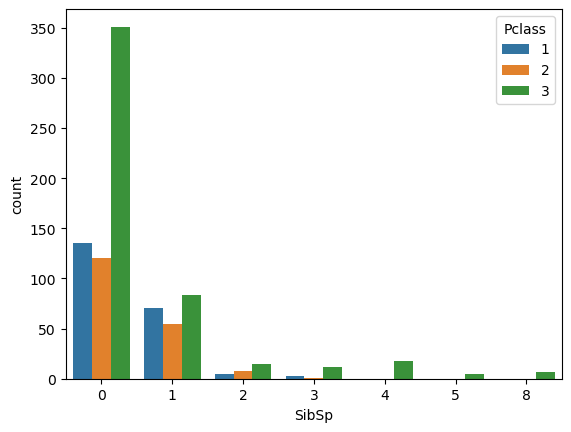

In [40]:
sns.countplot(data=train, x='SibSp', hue='Pclass');

* **The bar graph shows that most of the passengers (608) had no siblings or spouses on board, as indicated by the large bars at the 0 mark on the x-axis. This indicates that the Titanic had more solo travelers than family travelers.**

* **The bar graph also shows that the ticket class varied depending on the number of siblings and spouses. The passengers who had no siblings or spouses were mostly in class 3, as indicated by the large green bar. The passengers who had one sibling or spouse were mostly in class 1, as indicated by the large blue bar. The passengers who had two or more siblings or spouses were mostly in class 3, as indicated by the small green bars. This indicates that the class of the ticket was influenced by the family size of the passenger, and that the larger the family, the lower the class.**

# 

## Conclusion:

The Titanic dataset is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. Here is a brief report on data preprocessing and data analysis of the Titanic dataset using Python:

**Data Preprocessing:**

The first step in data analysis is data preprocessing. The following steps were taken to preprocess the Titanic dataset:

**Loading the dataset:** The Titanic dataset was loaded into Python using the Pandas library.

**Handling missing values:** The columns having null values were identified and filled up with appropriate values.

After preprocessing the data, the next step is data analysis. The following steps were taken to analyze the Titanic dataset:

**Exploratory Data Analysis (EDA):** EDA is a method used to analyze and summarize datasets. Majority of the EDA techniques involve the use of graphs. Seaborn is a python library used to statistically visualize data. Seaborn, built over Matplotlib, provides a better interface and ease of usage. The following graphs were plotted to analyze the Titanic dataset:
* **Survival rate based on gender:** The survival rate of men and women was compared. It was observed that the survival rate of women was much higher than that of men.
* **Survival rate based on passenger class:** The survival rate of passengers in different classes was compared. It was observed that the survival rate of passengers in first class was much higher than that of passengers in second and third class.
* **Survival rate based on age:** The survival rate of passengers of different age groups was compared. It was observed that the survival rate of children was much higher than that of adults.

# Thank you!